<a href="https://colab.research.google.com/github/kedzkiest/2.5D_prototype/blob/main/ImageRecognitionAndUnderstanding_Report3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

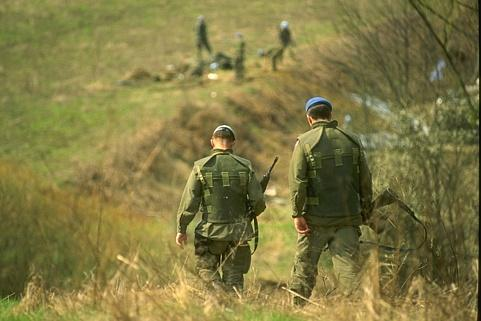

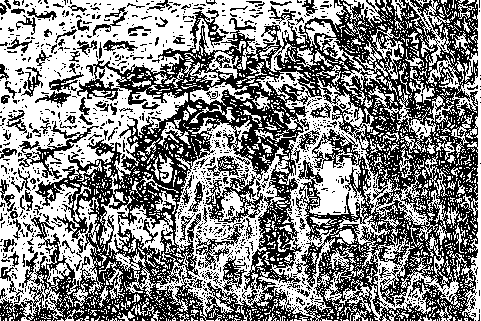

In [75]:
# Read the image
image = cv2.imread('170057.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator to compute gradients
grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude and direction
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_direction = np.arctan2(grad_y, grad_x)

# Thresholding to segment the image
threshold_min = 30
threshold_max = 100
binary_output = np.zeros_like(gradient_magnitude)
binary_output[(gradient_magnitude >= threshold_min) & (gradient_magnitude <= threshold_max)] = 1

# Display the original and segmented images
cv2_imshow(image)
cv2_imshow(255 - binary_output * 255)

cv2.waitKey(0)
cv2.destroyAllWindows()

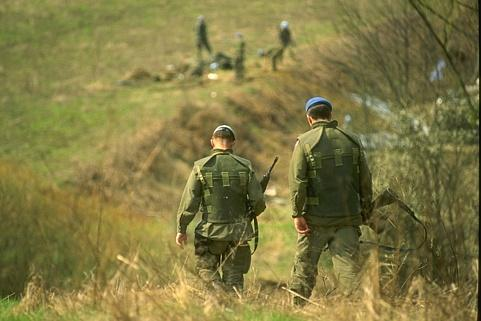

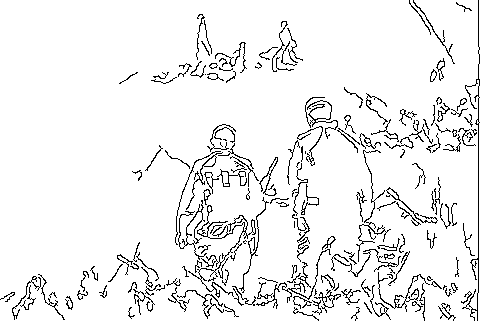

In [76]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detector
edges = cv2.Canny(blurred, 50, 150)

# Display the original and segmented images
cv2_imshow(image)
cv2_imshow(255 - edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

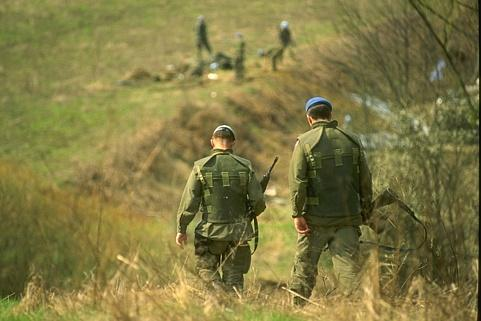

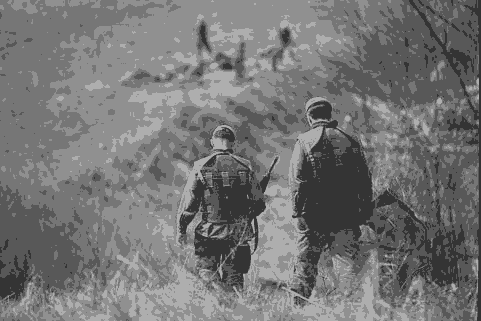

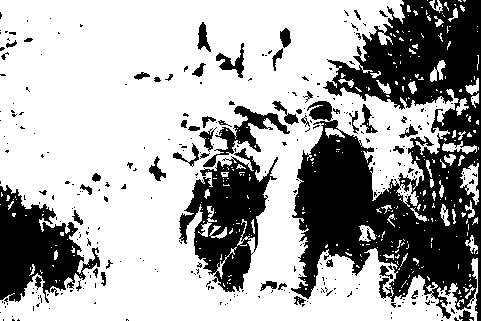

In [77]:
# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert the data type to floating-point
pixels = np.float32(pixels)

# Define the criteria (number of iterations, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Set the number of clusters (colors) you want to segment the image into
k = 5

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape the segmented image back to the original dimensions
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
cv2_imshow(image)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(segmented_image)
ret, segmented_image = cv2.threshold(segmented_image, 0, 255, cv2.THRESH_OTSU)
cv2_imshow(segmented_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

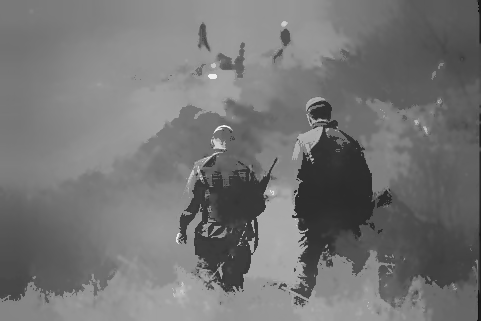

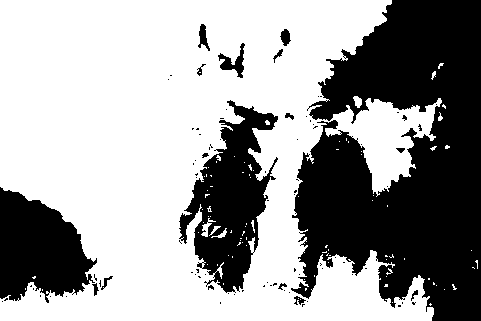

In [78]:
import numpy as np
import cv2

# Convert the image to the LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Reshape the image to a 2D array
vectorized = lab_image.reshape((-1, 3))

# Convert the 2D array to floating point
vectorized = np.float32(vectorized)

# Define criteria and apply mean shift
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
filtered_image = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40, maxLevel=1, termcrit=criteria)

# Display the filtered image
filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(filtered_image)
ret, filtered_image = cv2.threshold(filtered_image, 0, 255, cv2.THRESH_OTSU)
cv2_imshow(filtered_image)

cv2.waitKey(0)
cv2.destroyAllWindows()
